# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1684031630551.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,05/12/2023,4124.08,--,4138.54,4143.74,4099.12
1,05/11/2023,4130.62,--,4132.24,4132.80,4109.29
2,05/10/2023,4137.64,--,4143.74,4154.28,4098.92
3,05/09/2023,4119.17,--,4124.25,4130.35,4116.65
4,05/08/2023,4138.12,--,4136.98,4142.30,4123.81
...,...,...,...,...,...,...
2537,05/17/2013,1667.47,--,1652.45,1667.47,1652.45
2538,05/16/2013,1650.47,--,1658.07,1660.51,1648.60
2539,05/15/2013,1658.78,--,1649.13,1661.49,1646.68
2540,05/14/2013,1650.34,--,1633.75,1651.10,1633.75


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2542.000000,2542.00000,2542.000000,2542.000000
mean,2824.474288,2806.55812,2821.838198,2789.986975
std,873.460520,909.59672,916.305481,902.344335
min,1573.090000,0.00000,0.000000,0.000000
25%,2076.402500,2073.80750,2082.880000,2063.212500
50%,2670.215000,2669.73000,2685.390000,2651.680000
75%,3510.197500,3509.38250,3528.795000,3490.120000
max,4796.560000,4804.51000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2519.000000,2519.000000,2519.000000,2519.000000
mean,2832.601957,2832.183700,2847.603295,2815.461250
std,873.145020,873.108455,879.708513,865.974771
min,1573.090000,1577.520000,1588.770000,1560.330000
25%,2079.395000,2078.515000,2086.735000,2067.590000
50%,2681.050000,2682.100000,2694.440000,2659.780000
75%,3548.015000,3548.165000,3575.090000,3515.245000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2541
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2519 non-null   object 
 1   Close/Last  2519 non-null   float64
 2   Volume      2519 non-null   object 
 3   Open        2519 non-null   float64
 4   High        2519 non-null   float64
 5   Low         2519 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.8+ KB


In [5]:
df.shape

(2519, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

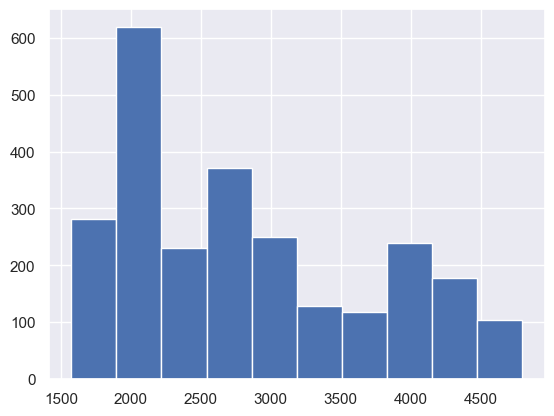

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4124.08

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2832.601957125851

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.1450203911032

In [11]:
sigma1 = close_mean + close_sd
sigma1

3705.7469775169543

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4578.891997908057

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5015.464508103609

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2519 entries, 0 to 2541
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2519 non-null   datetime64[ns]
 1   Close/Last  2519 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-05-13 to 2023-05-12')

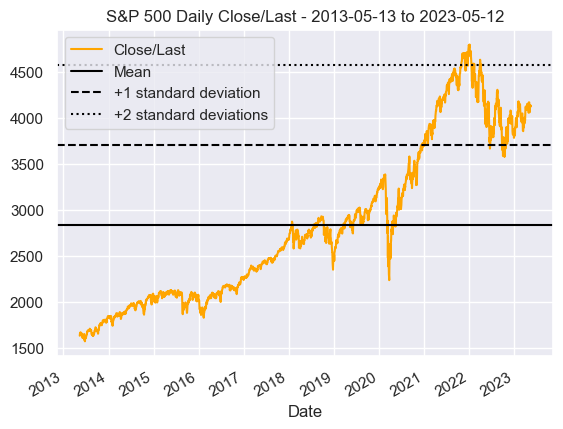

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-05-13 to 2023-05-12')

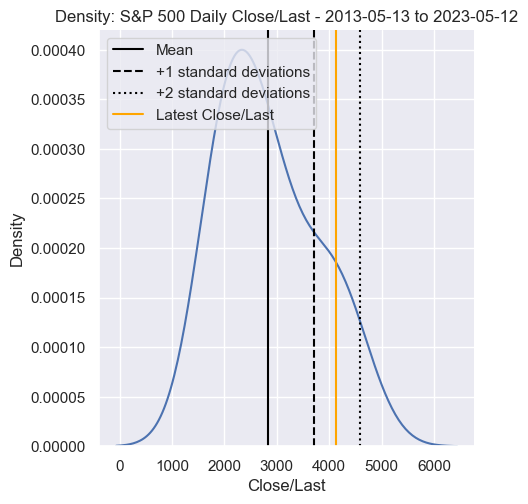

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4791105861150806

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results